In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [3]:
#  Check data types for object/category dtypes
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical variables:")
print(categorical_cols)



Categorical variables:
['diagnosis']


In [4]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("numeric variables:")
print(numeric_cols)

numeric variables:
['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis_encoded'] = le.fit_transform(df['diagnosis'])
df=df.drop(columns=['diagnosis','id'],axis=1)
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [6]:
unique_values = set(df['diagnosis_encoded'].unique())
unique_values

{0, 1}

In [7]:
for col in df:
    if (df[col] < 0 ).any():
        print(f"Negative values found in {col}: {(df[col] < 0).sum()}")
    else:
        print('No inconsistent input')


No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input
No inconsistent input


In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
x=df.drop(columns=['diagnosis_encoded'],axis=1)
y=df.diagnosis_encoded

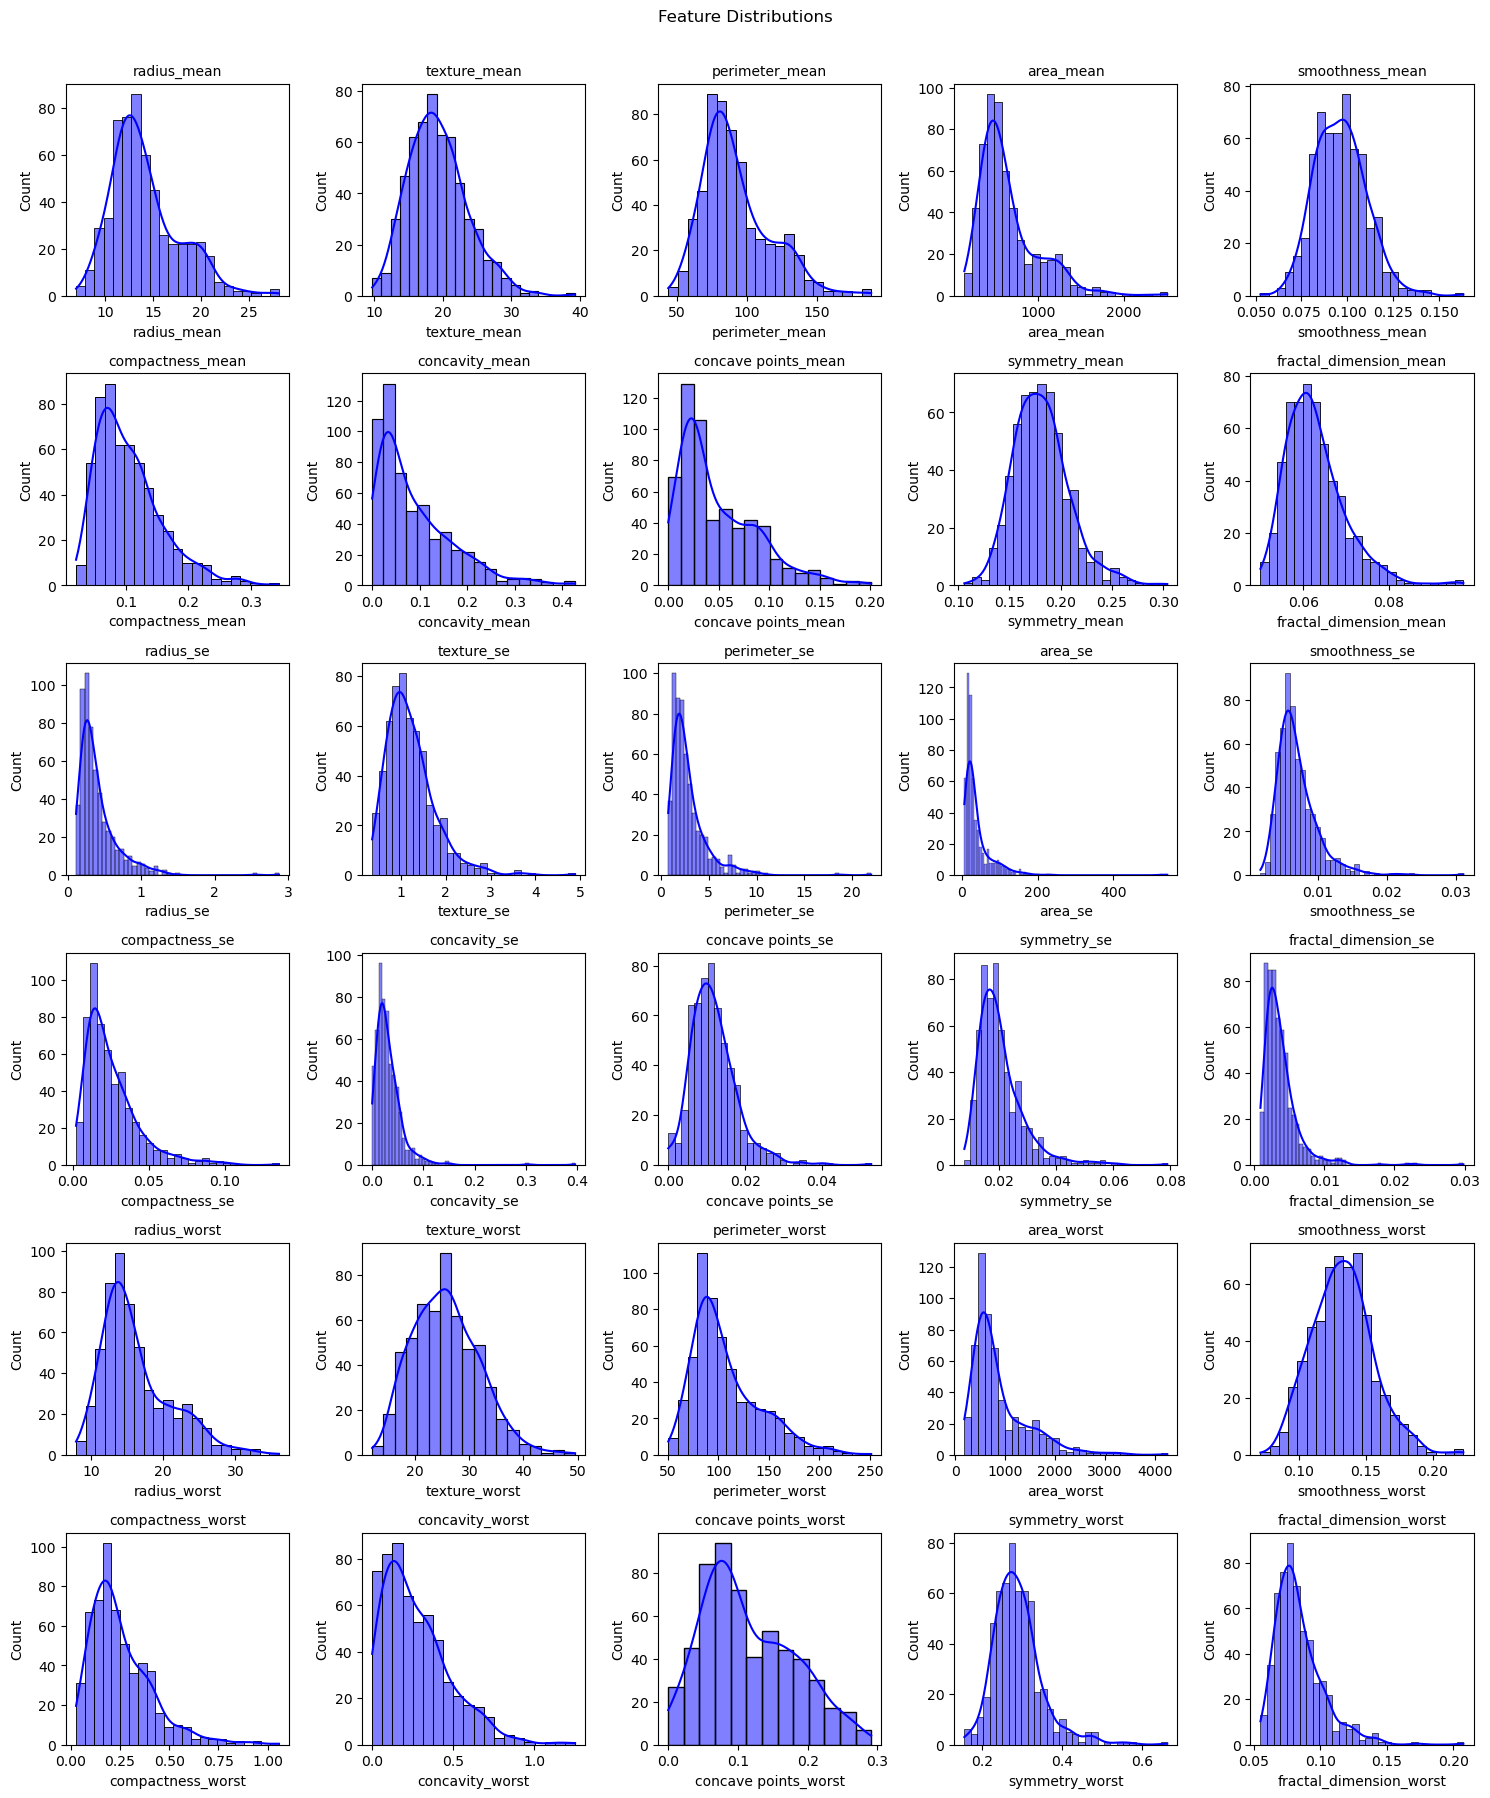

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))
for i, col in enumerate(x.columns):
    plt.subplot(7, 5, i+1)
    sns.histplot(x[col], kde=True, color='blue')
    plt.title(col, fontsize=10)
    plt.tight_layout()
plt.suptitle('Feature Distributions', y=1.02)
plt.show()

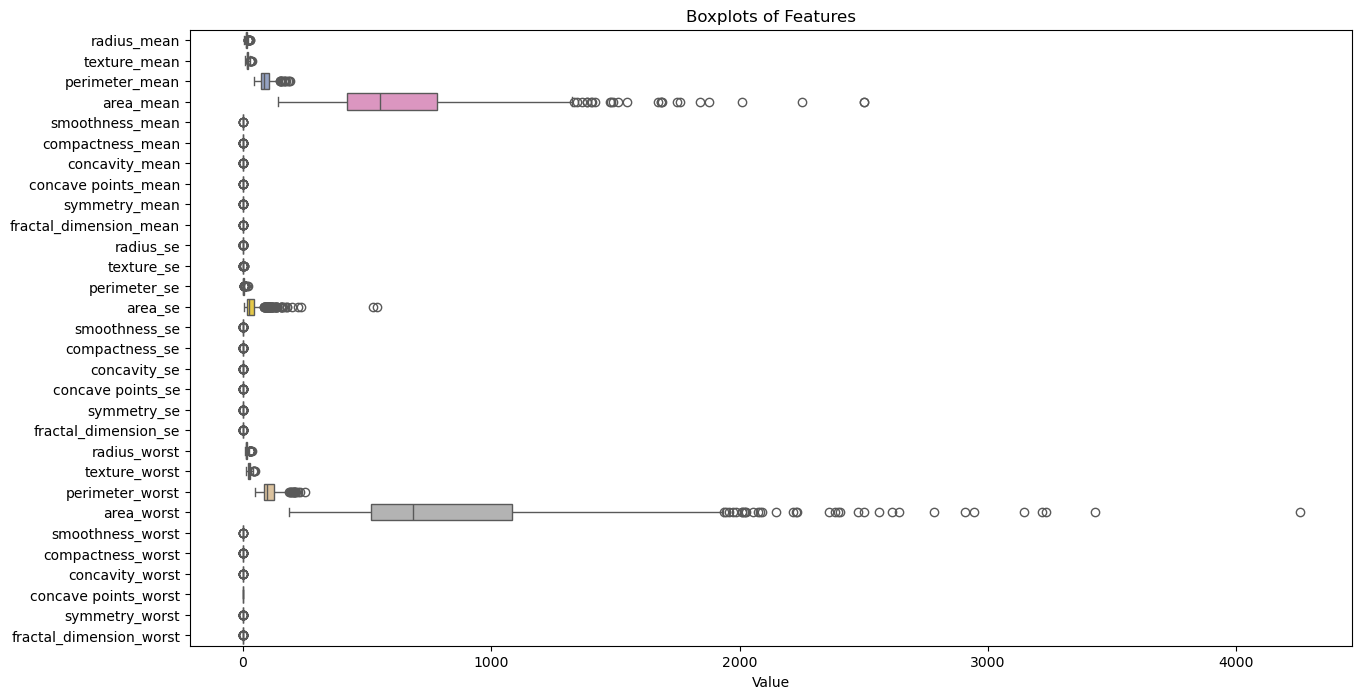

In [11]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=x, orient='h', palette='Set2')
plt.title('Boxplots of Features')
plt.xlabel('Value')
plt.show()

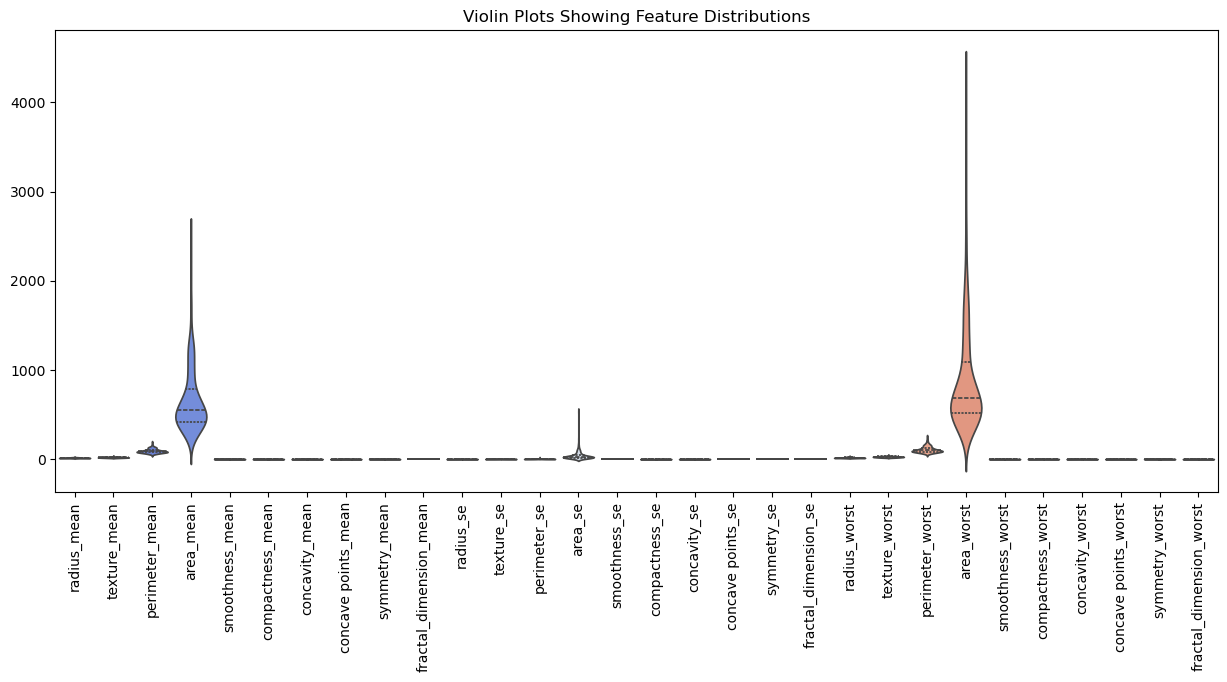

In [12]:
plt.figure(figsize=(15, 6))
sns.violinplot(data=x, inner='quartile', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Violin Plots Showing Feature Distributions')
plt.show()

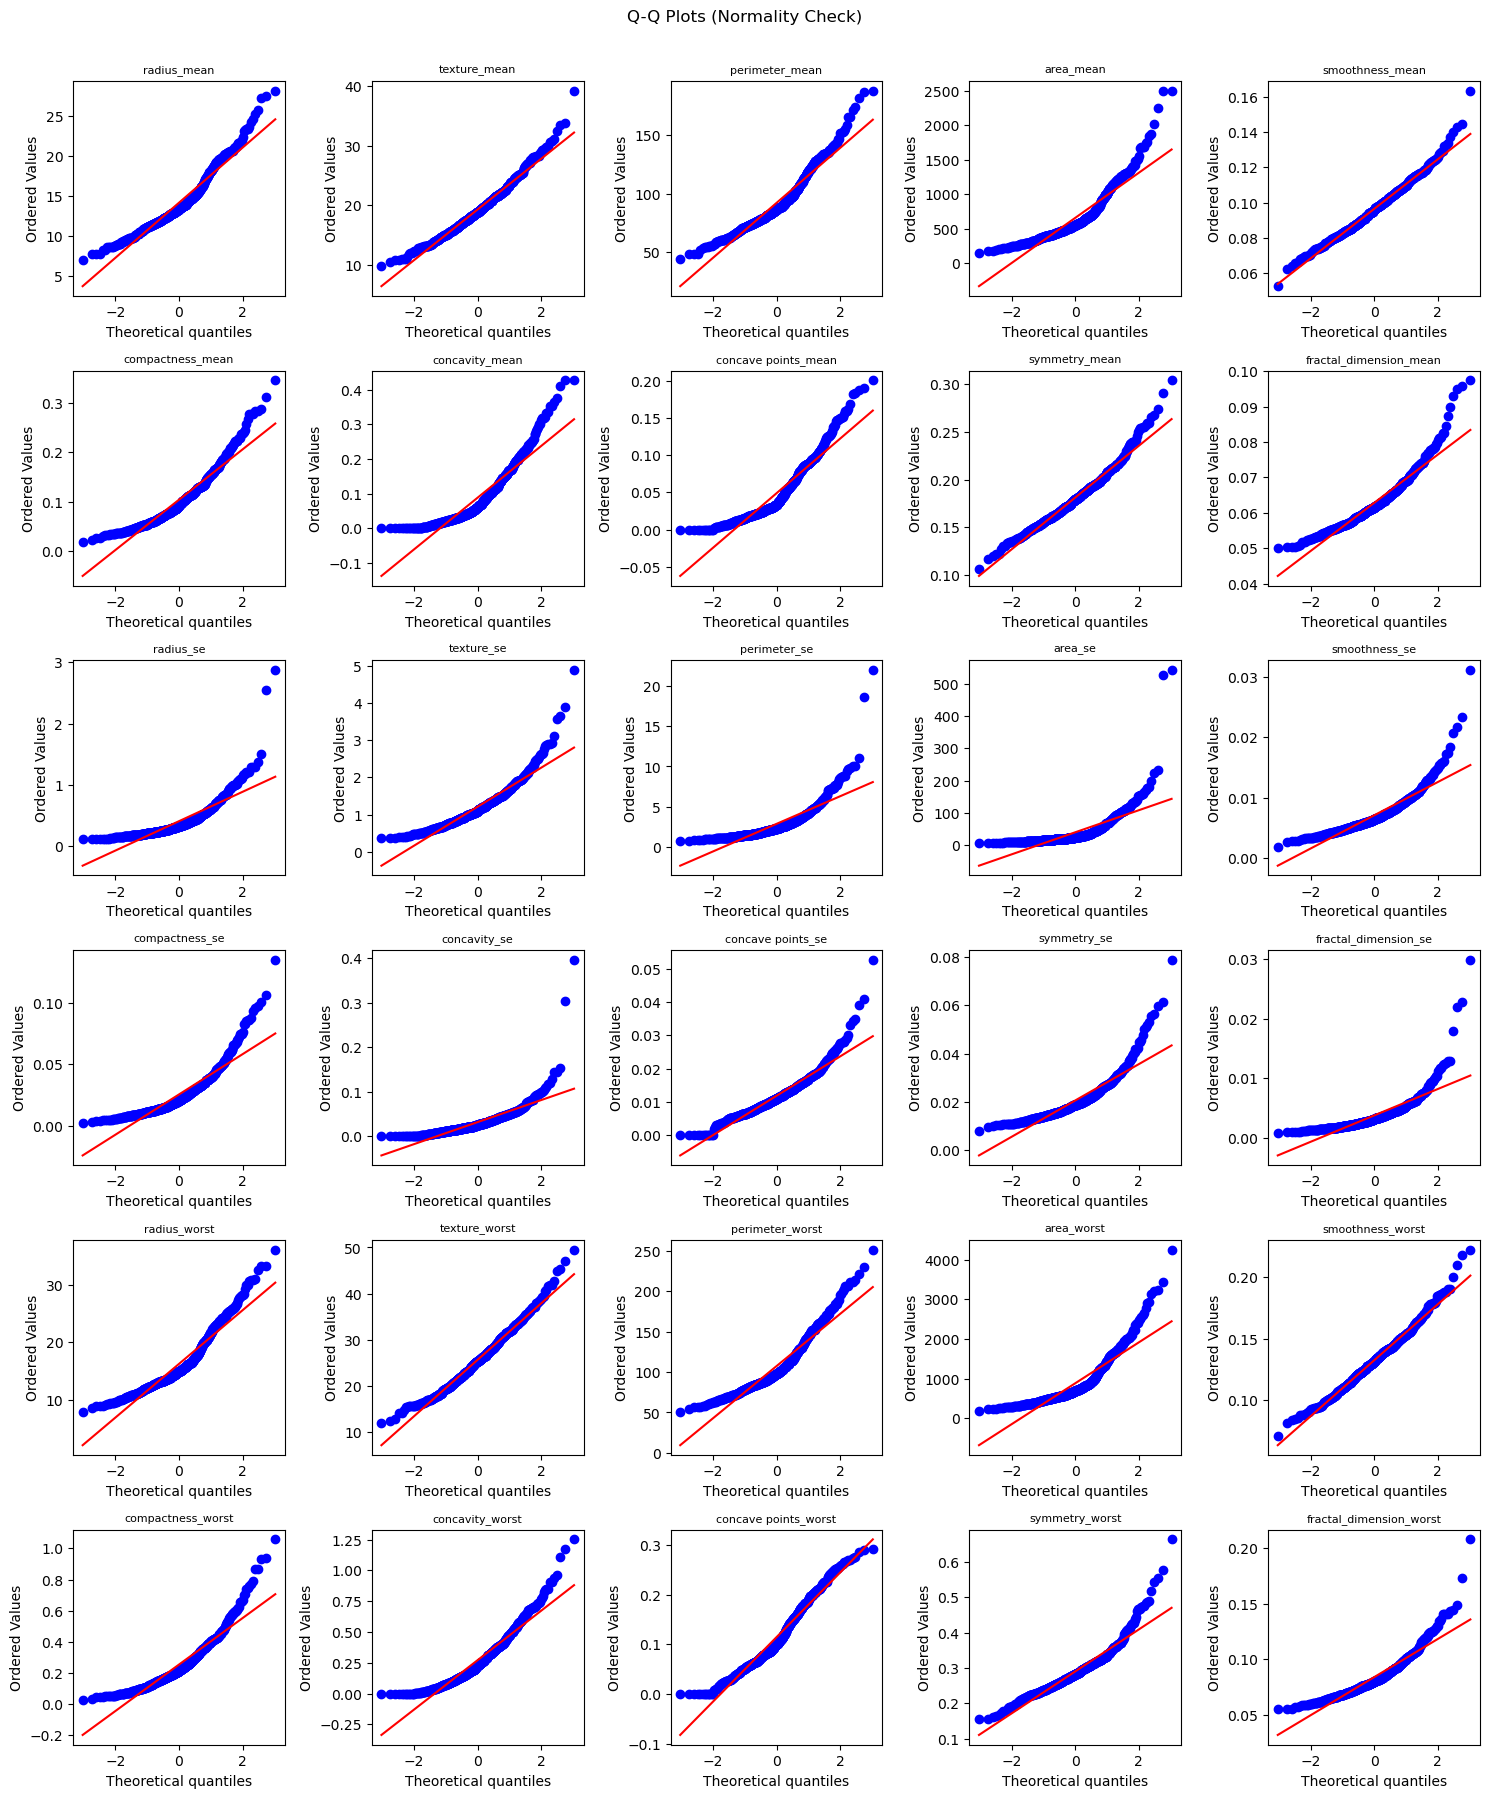

In [13]:
import scipy.stats as stats

plt.figure(figsize=(15, 20))
for i, col in enumerate(x.columns):
    plt.subplot(7, 5, i+1)
    stats.probplot(x[col], dist="norm", plot=plt)
    plt.title(col, fontsize=8)
    plt.tight_layout()
plt.suptitle('Q-Q Plots (Normality Check)', y=1.02)
plt.show()

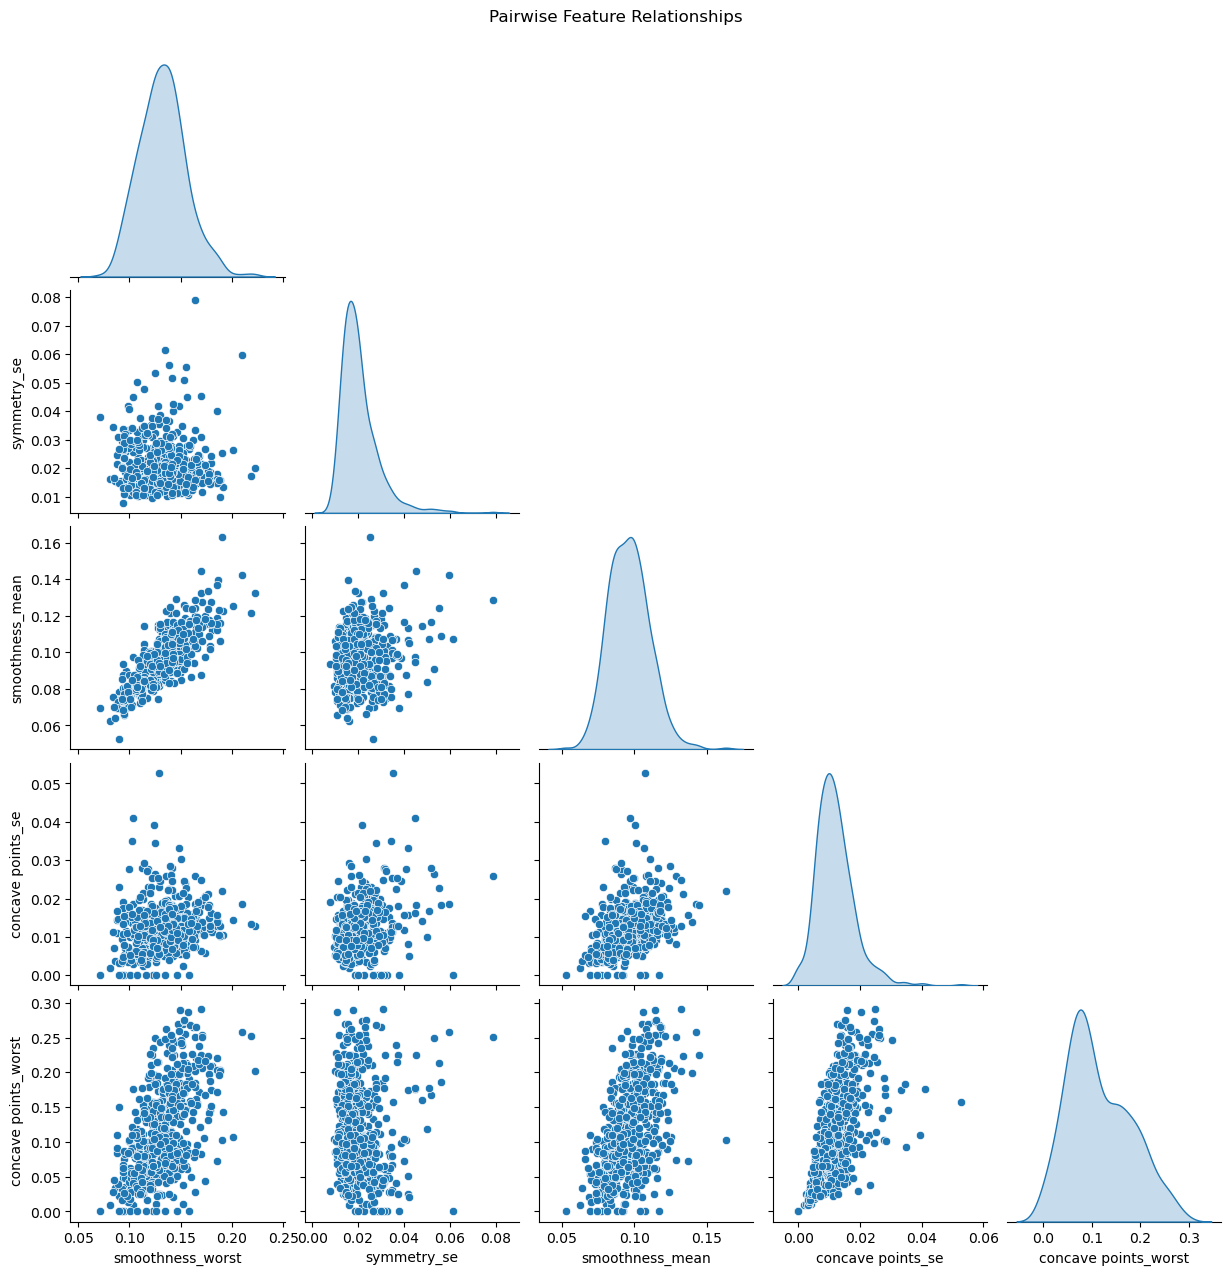

In [14]:
import numpy as np
# Select 5 random features for visualization
features = np.random.choice(x.columns, 5, replace=False)
sns.pairplot(x[features], diag_kind='kde', corner=True)
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

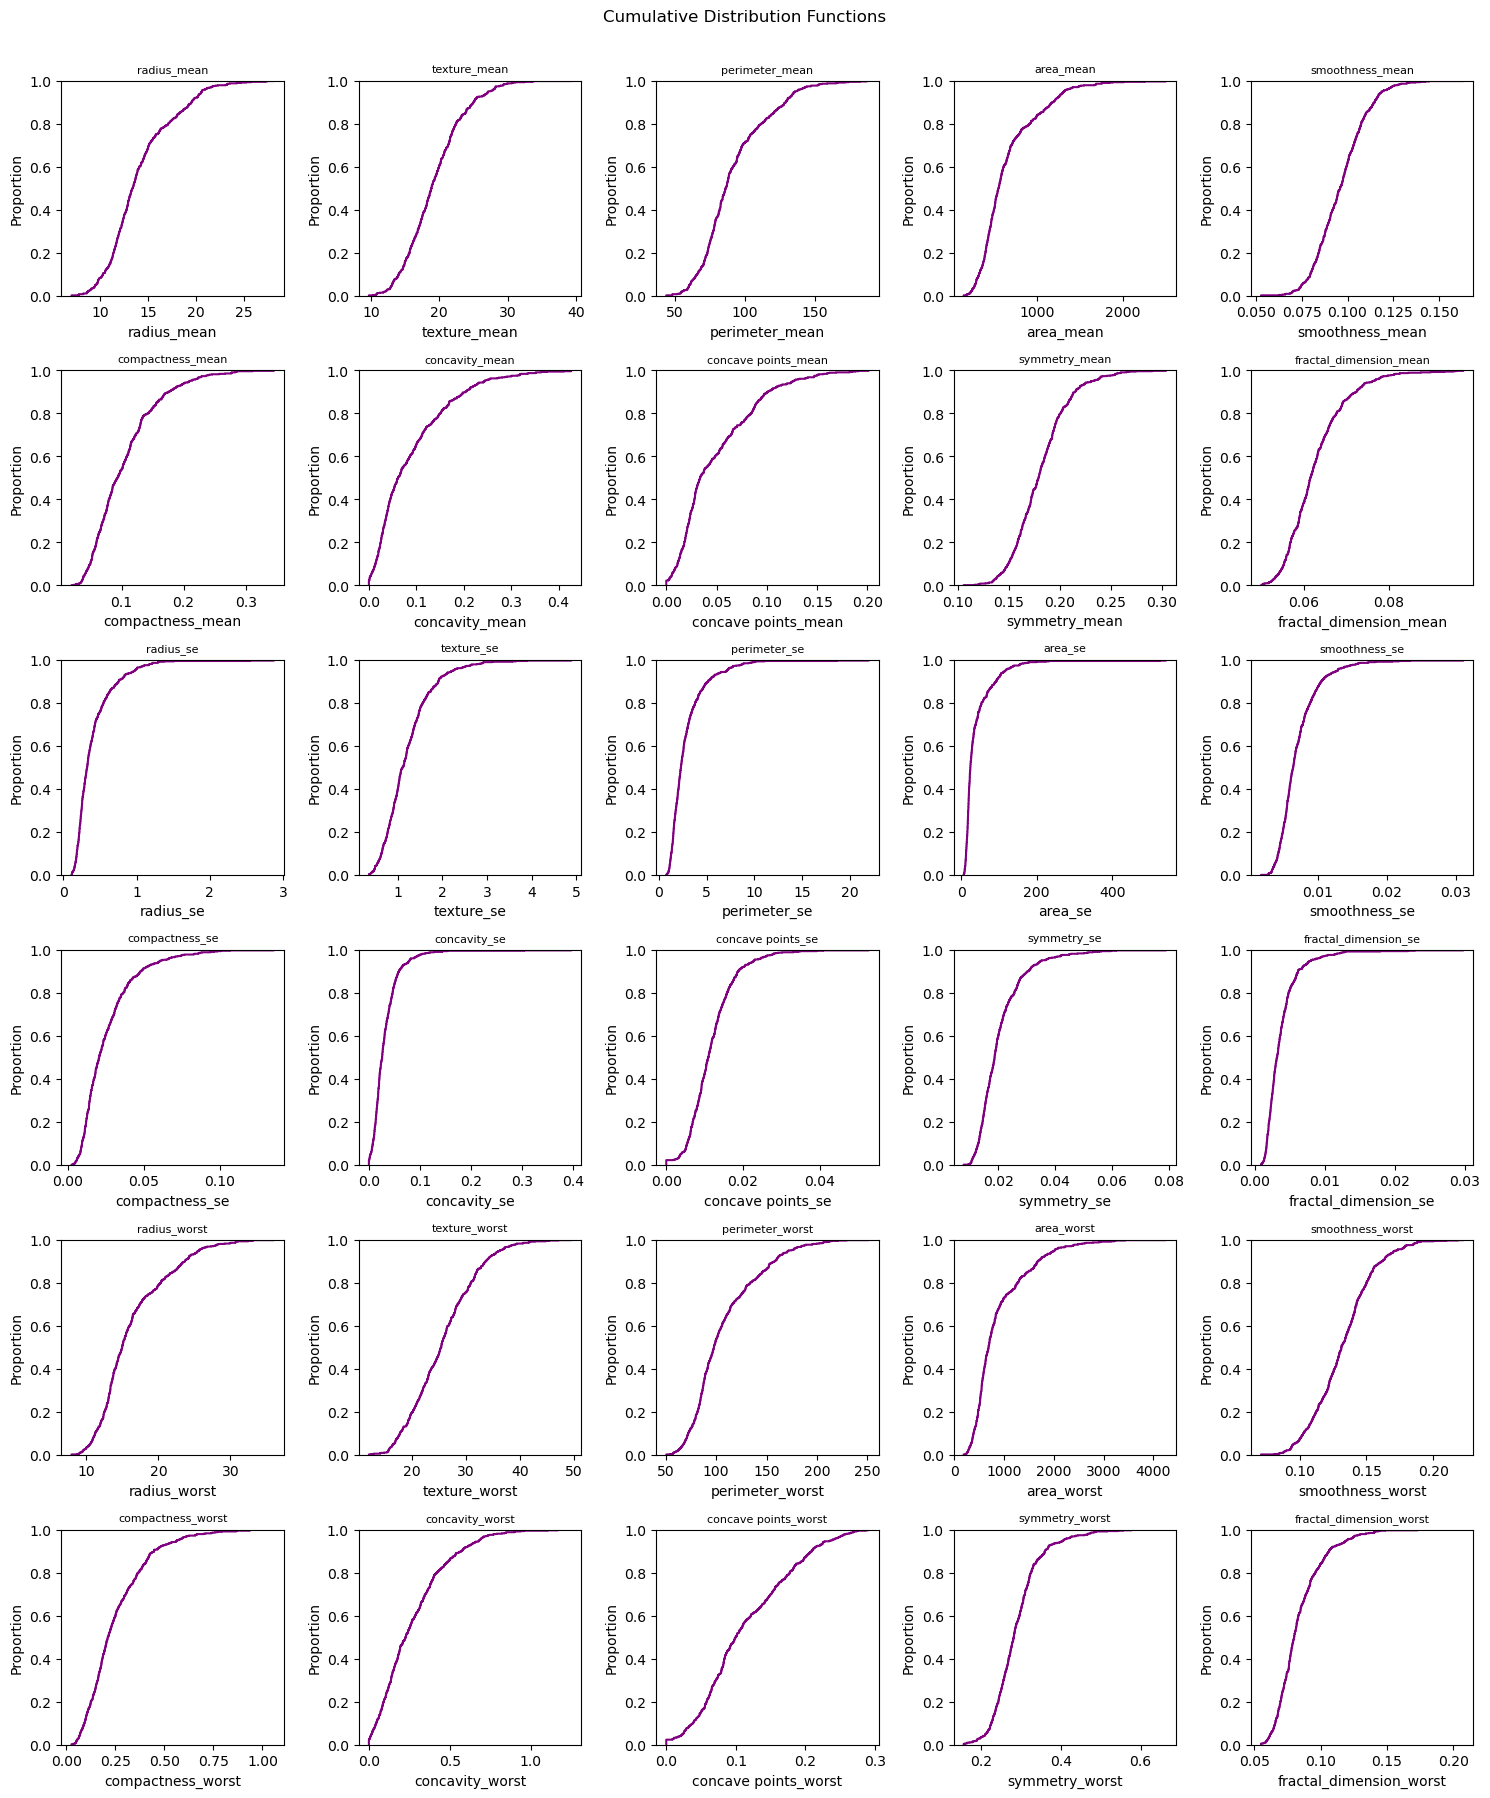

In [15]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(x.columns):
    plt.subplot(7, 5, i+1)
    sns.ecdfplot(x[col], color='purple')
    plt.title(col, fontsize=8)
    plt.tight_layout()
plt.suptitle('Cumulative Distribution Functions', y=1.02)
plt.show()

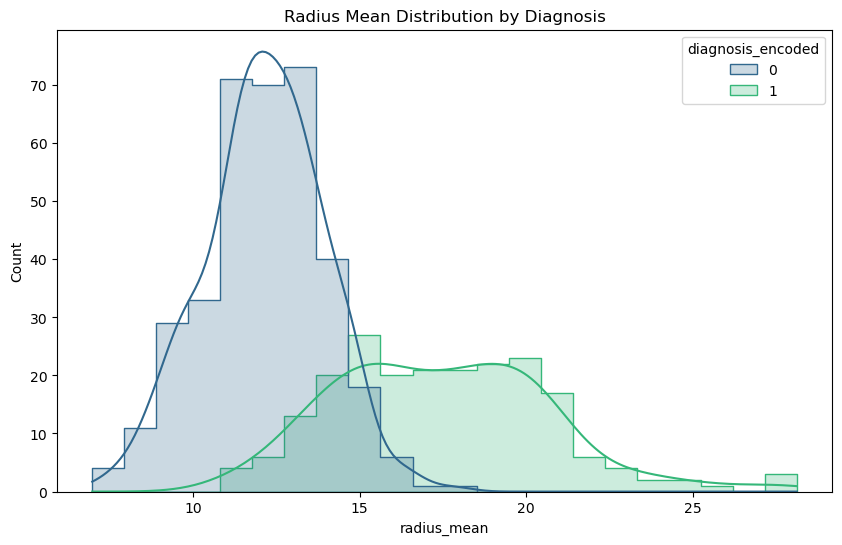

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='radius_mean', hue='diagnosis_encoded', kde=True, element='step', palette='viridis')
plt.title('Radius Mean Distribution by Diagnosis')
plt.show()

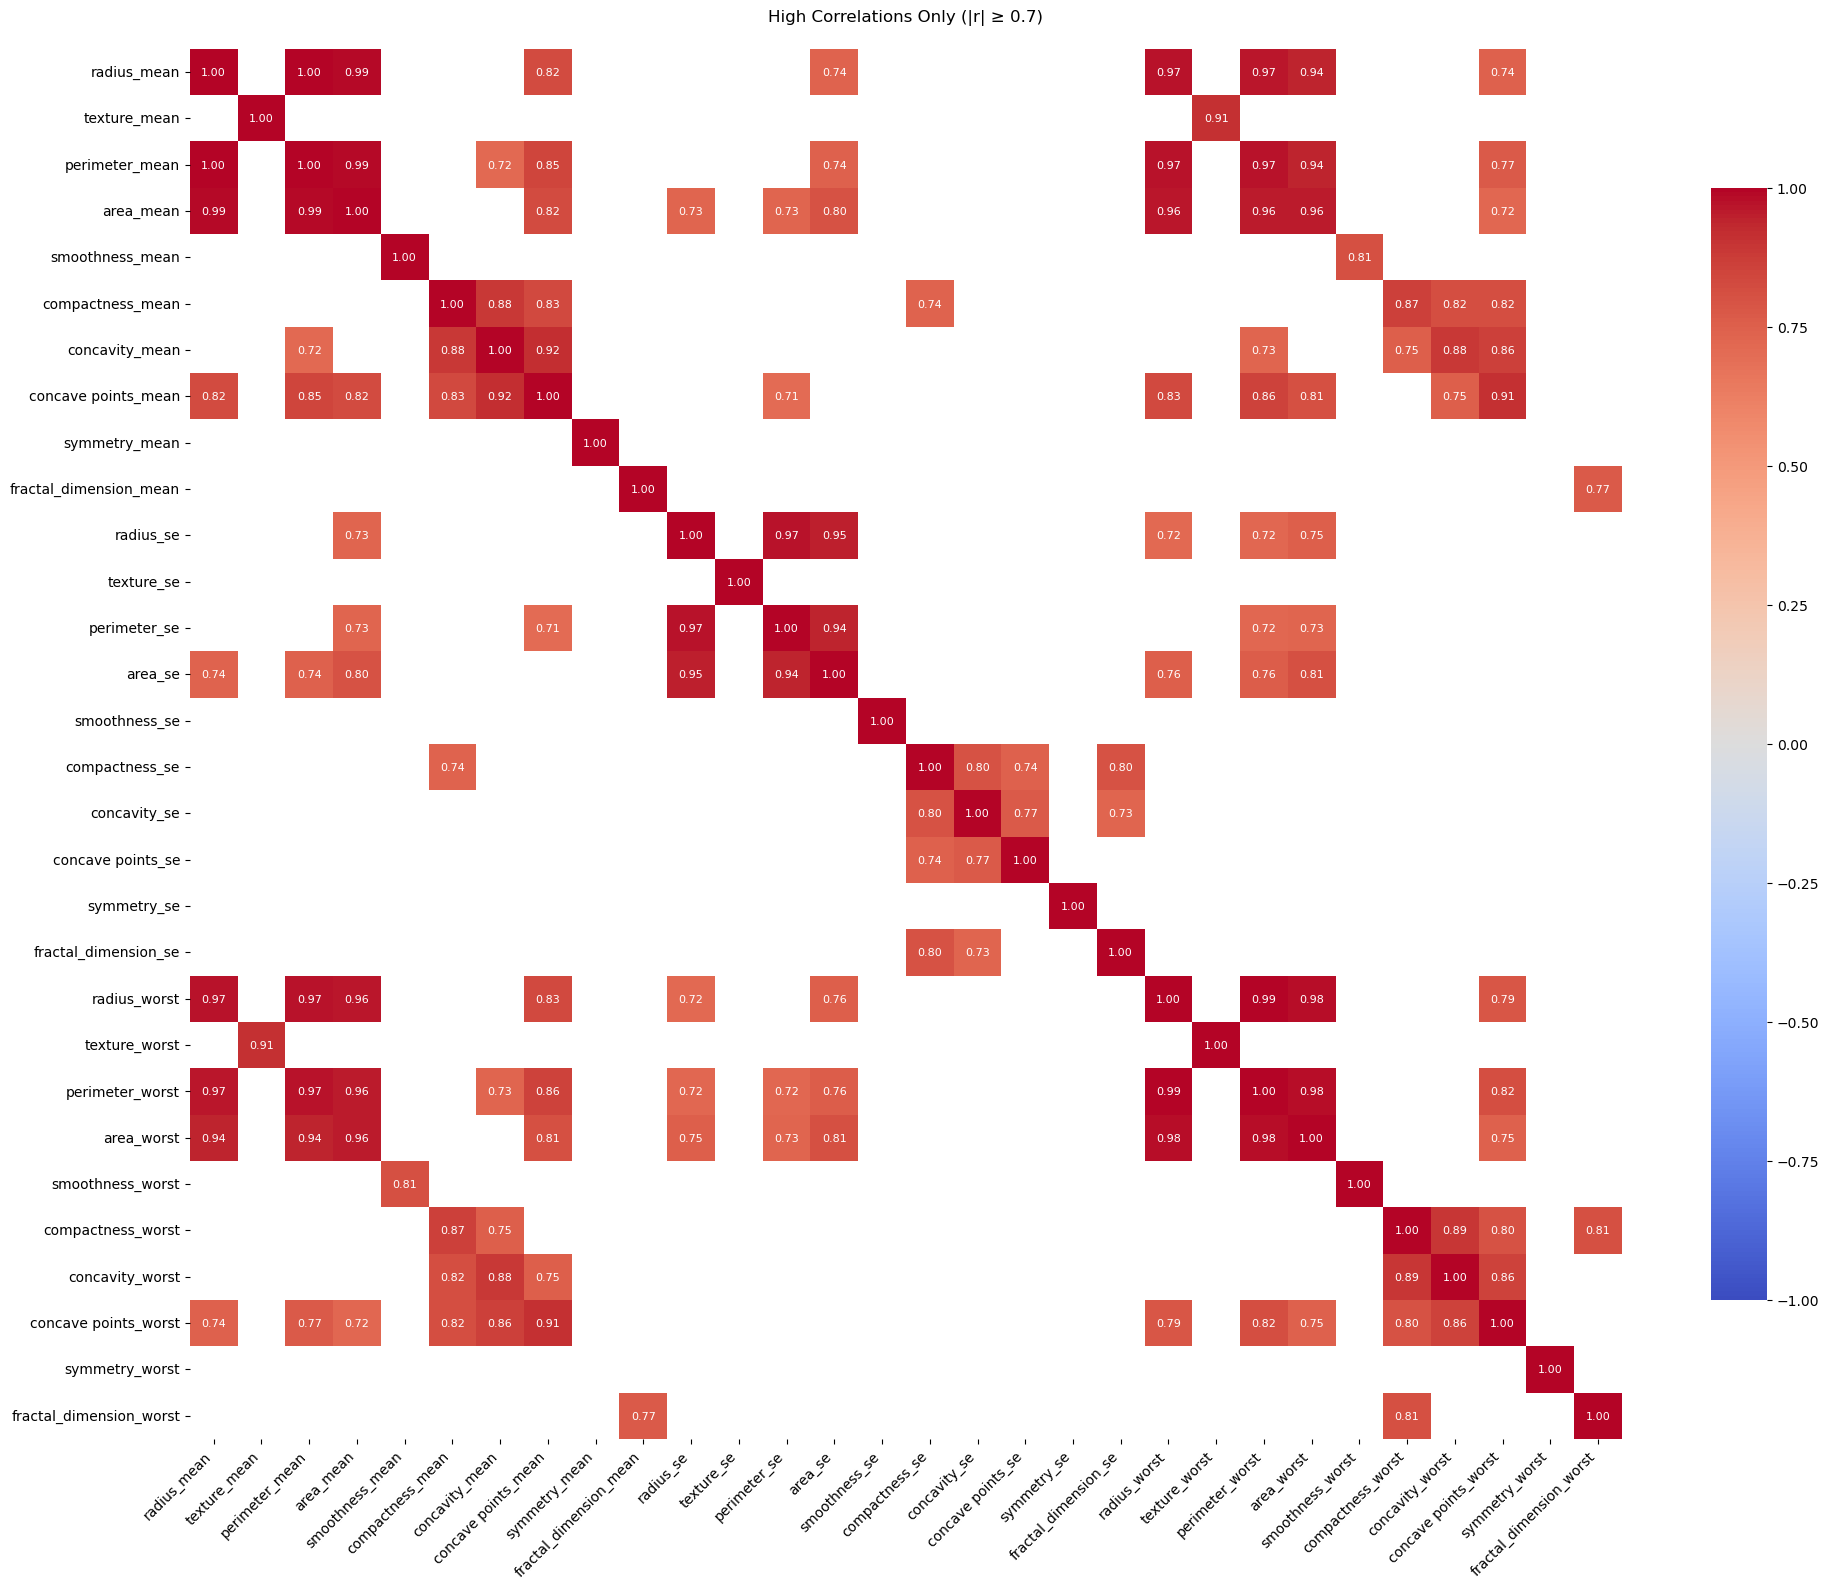

In [17]:
corr_matrix = x.corr()
plt.figure(figsize=(20, 16))
# Filter correlations > 0.7 (adjust threshold)
mask = (abs(corr_matrix) < 0.7) & (corr_matrix != 1)
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, fmt=".2f",
            annot_kws={'size': 8}, cbar_kws={'shrink': 0.8})
plt.title('High Correlations Only (|r| ≥ 0.7)', pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
from scipy import stats
z_scores = np.abs(stats.zscore(df))
outliers = (z_scores > 3).sum(axis=0)
print("Outliers (>3σ) per feature:\n", outliers)

Outliers (>3σ) per feature:
 radius_mean                 5
texture_mean                4
perimeter_mean              7
area_mean                   8
smoothness_mean             5
compactness_mean            9
concavity_mean              9
concave points_mean         6
symmetry_mean               5
fractal_dimension_mean      7
radius_se                   7
texture_se                  9
perimeter_se                8
area_se                     6
smoothness_se               7
compactness_se             12
concavity_se                6
concave points_se           6
symmetry_se                11
fractal_dimension_se       10
radius_worst                6
texture_worst               4
perimeter_worst             6
area_worst                 10
smoothness_worst            3
compactness_worst          10
concavity_worst             7
concave points_worst        0
symmetry_worst              9
fractal_dimension_worst     9
diagnosis_encoded           0
dtype: int64


In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

print(f"Original rows: {df.shape[0]}, Cleaned rows: {df_cleaned.shape[0]}")

Original rows: 569, Cleaned rows: 398


In [20]:
x=df_cleaned.drop(columns=['diagnosis_encoded'],axis=1)
y=df_cleaned.diagnosis_encoded


In [21]:
print(df_cleaned.dtypes)

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[ 1.96446135,  0.37737666,  1.9735965 , ...,  1.94101971,
         0.62569152,  0.33309218],
       [ 0.13454011,  0.5949777 ,  0.22572161, ...,  1.18759204,
         0.93155151,  2.8540759 ],
       [ 1.06562338,  1.21194062,  0.9688657 , ...,  0.06847141,
         0.36122611,  0.40048958],
       ...,
       [ 0.4892385 ,  1.06857994,  0.59372656, ...,  0.28387958,
        -1.22556631,  0.04103678],
       [ 0.27158267,  2.21290537,  0.29587441, ...,  0.16966315,
        -1.24396391,  0.29538173],
       [ 1.29940186,  2.4509865 ,  1.30179425, ...,  0.91106805,
        -1.31755428, -0.10659563]])

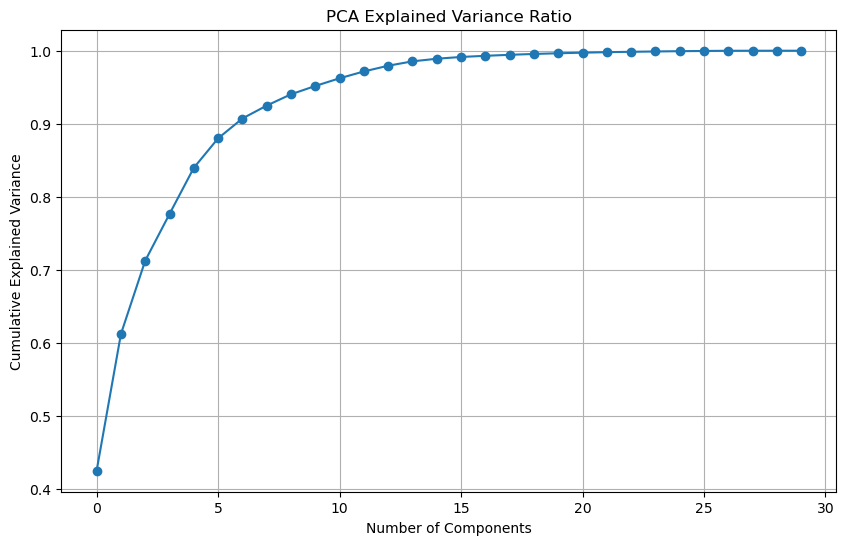


Top features per principal component (PC1-5):
PC1       concave points_mean
PC2    fractal_dimension_mean
PC3                texture_se
PC4             symmetry_mean
PC5             texture_worst
dtype: object

Overall feature importance from PCA:
                                         Feature  Importance
texture_mean                        texture_mean    1.043570
texture_worst                      texture_worst    1.035846
compactness_se                    compactness_se    0.976437
smoothness_worst                smoothness_worst    0.968230
symmetry_worst                    symmetry_worst    0.940499
concavity_se                        concavity_se    0.937271
radius_se                              radius_se    0.911606
fractal_dimension_se        fractal_dimension_se    0.907925
symmetry_se                          symmetry_se    0.899956
area_se                                  area_se    0.834380
fractal_dimension_worst  fractal_dimension_worst    0.834249
perimeter_se       

In [23]:
# Initializing PCA
pca = PCA(n_components=None)
x_pca=pca.fit_transform(X_scaled)

#Analyzing explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Ratio')
plt.grid()
plt.show()

# Geting feature importance from PCA components
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i}' for i in range(1, len(x.columns)+1)],
    index=x.columns
)

# Identifying most influential features on top 5 PCs
top_n_components = 5
print(f"\nTop features per principal component (PC1-{top_n_components}):")
print(loadings.iloc[:, :top_n_components].abs().idxmax())

# Feature importance based on absolute loadings
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': np.sum(np.abs(loadings.iloc[:, :top_n_components]), axis=1)
}).sort_values('Importance', ascending=False)

print("\nOverall feature importance from PCA:")
print(feature_importance.head(30))

In [24]:
x_pca.shape

(398, 30)

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_pca_train, X_pca_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)
X_pca_train.shape, X_pca_test.shape, y_train.shape, y_test.shape

((318, 30), (80, 30), (318,), (80,))

In [26]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5],
            'subsample': [0.8, 1.0]
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5]
        }
    }
}

scores = []

for model_name, mp in models.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5)
    clf.fit(X_pca_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })



In [27]:
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,Logistic Regression,0.962351,"{'C': 1, 'solver': 'liblinear'}"
1,Random Forest,0.946528,"{'max_depth': 10, 'min_samples_split': 2, 'n_e..."
2,Gradient Boosting,0.911905,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
3,XGBoost,0.940327,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
4,SVC,0.968601,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}"
5,KNN,0.952778,"{'n_neighbors': 5, 'weights': 'uniform'}"
6,Naive Bayes,0.914931,{}
7,Decision Tree,0.899306,"{'max_depth': 5, 'min_samples_split': 2}"


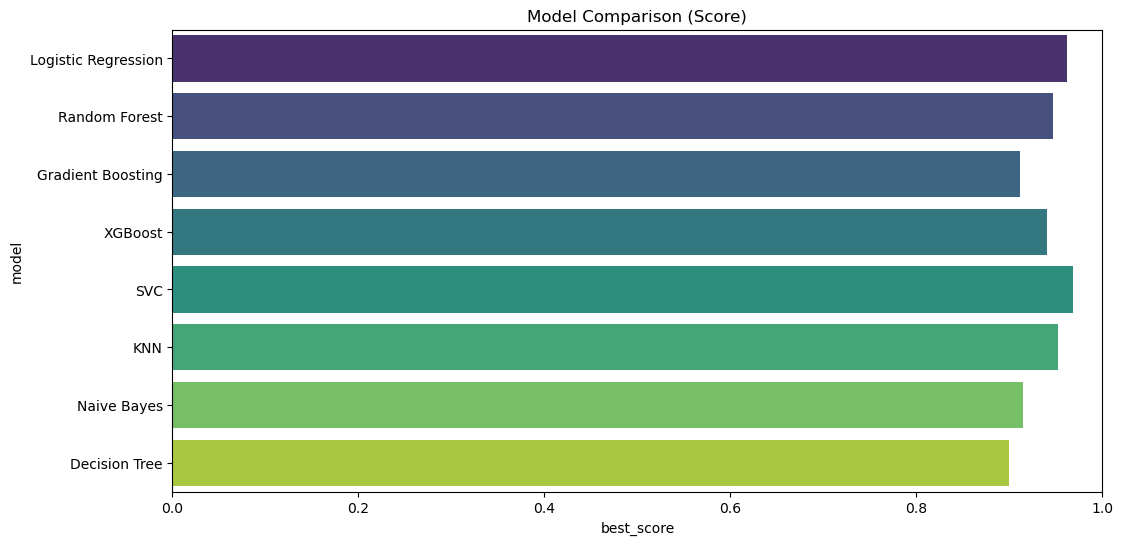

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_score, x='best_score', y='model', palette='viridis')
plt.title('Model Comparison (Score)')
plt.xlim(0, 1)
plt.show()

In [29]:
best_model=SVC(C= 0.1, gamma= 'scale', kernel= 'linear')
best_model.fit(X_pca_train,y_train)
best_model.predict(X_pca_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [30]:
best_model.score(X_pca_test,y_test)

0.9625

  0%|          | 0/80 [00:00<?, ?it/s]

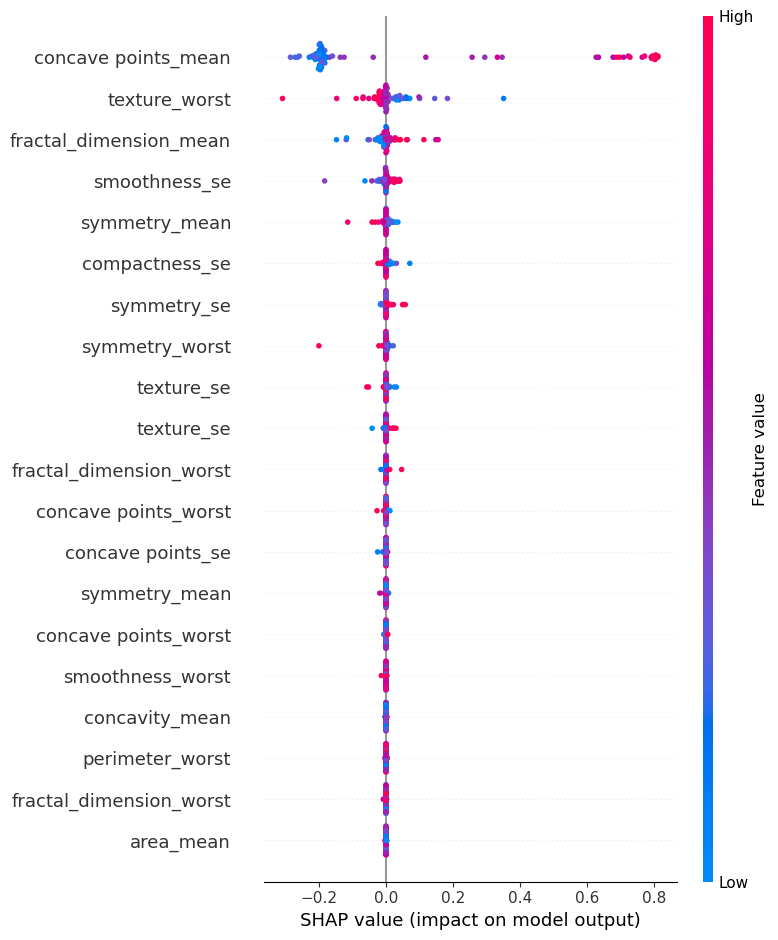

<Figure size 640x480 with 0 Axes>

In [34]:
import shap
import numpy as np

background = shap.kmeans(X_pca_train, 10)
explainer = shap.KernelExplainer(best_model.predict, background)

shap_values = explainer.shap_values(X_pca_test[:100])
if isinstance(shap_values, list):
    shap_values = np.array(shap_values)[0]

num_features = X_pca_train.shape[1]

top_n_components = 29
feature_names=loadings.iloc[:, :top_n_components].abs().idxmax()


shap.summary_plot(shap_values, X_pca_test[:100], feature_names=feature_names)

plt.tight_layout()
plt.show()

    -->General Observations on Feature Influence in the Model Outcome<--

> Shape-related features (concave points, concavity, fractal dimension) are 
 the most influential

• Malignant tumors tend to have irregular, concave, and complex boundaries.

• Features like concave points_mean and concavity_mean have the strongest 
  impact on the model's prediction.

> Size-related features (radius, perimeter, area) also play a significant role

• Larger tumors are more likely to be malignant.
 
• Features like radius_worst, perimeter_worst, and area_worst contribute 
  positively to malignancy classification.

> Texture and symmetry have moderate influence

• Malignant tumors tend to have more heterogeneous texture and asymmetry.

• Features like texture_worst and symmetry_worst contribute to the prediction 
 but with less impact compared to shape and size-related features.

> Feature impact varies across data points

• Some features show a wide range of SHAP values, indicating that their 
 influence depends on individual tumor characteristics.

• For example, concave points_mean has a consistent and strong positive 
 impact, while symmetry_mean has a more scattered effect.

> Low feature values (blue) and high feature values (red) impact predictions 
 differently

• Higher values of key features (e.g., concave points, radius, texture) 
 increase the model’s probability of predicting malignancy.

• Lower values generally push predictions toward benign classification.

> Some features have minimal effect

• Features like fractal_dimension_worst and smoothness_se show SHAP values 
  centered around zero, indicating they have little influence on the model’s 
  decision.